In [ ]:
from random import gauss, seed

# seeding is done to maintain consistent results across simulations
# if this is not done, we get different results each time
# and it's difficult to reproduce.
seed(30)
def new_position(last):
  velocity = 10
  wind = gauss(0, 2)
  wave = gauss(0, 0.1)
  return last + velocity + wind + wave

In [ ]:
true_position = [0, 9, 19.2, 28, 38.1, 48.5, 57.2, 66.2, 77.5, 85, 95.2]
def sensor(t):
  if t == 3:
    # oops, passing through a thunderstorm. GPS fluctuating!
    sensor_noise = gauss(5, 10)
  elif t == 6:
    # uh-oh, satellite unavailable!
    sensor_noise = gauss(-5, 10)
  else:
    sensor_noise = gauss(0, 1)
  return true_position[t] + sensor_noise

In [ ]:
def combine(A, B, trustA, trustB):
  total_trust = trustA + trustB
  return (A * trustA + B * trustB) / total_trust

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


In [ ]:
from statistics import variance

def update(t, last):
  velocity_updates = []
  sensor_updates = []
  for p in range(1000):   # for each passenger
    velocity_updates.append(new_position(last[p]))
    sensor_updates.append(sensor(t))

  # Calculate trust metrics for velocity and sensor measurements
  # Remember that as variance increases, trust decreases
  # And vice-versa
  variance_velocity = variance(velocity_updates)
  variance_sensor = variance(sensor_updates)

  # calculate trust
  trust_velocity = 1/variance_velocity
  trust_sensor = 1/variance_sensor

  # combine these together for each passenger
  combined = []
  for p in range(1000):
    combined.append(combine(A = velocity_updates[p],
                            B = sensor_updates[p],
                            trustA = trust_velocity,
                            trustB = trust_sensor))
  # Sensor updates & velocity updates returned for plotting purposes
  return sensor_updates, velocity_updates, combined

In [ ]:
# We'll do a final plot using this list
plot_data = []

def update_plot(t, sensor, velocity, combined_position):
  # add true position at this time
  plot_data.append({'passenger': 'true', 'type': 'true', 'time': t,
                    'position': true_position[t]})
  # for each passengers
  for p in range(1000):
    plot_data.append({'passenger': p, 'type': 'sensor', 'time': t,
                    'position': sensor[p]})
    plot_data.append({'passenger': p, 'type': 'velocity', 'time': t,
                    'position': velocity[p]})
    plot_data.append({'passenger': p, 'type': 'combined', 'time': t,
                    'position': combined_position[p]})

update_plot(0, [0]*1000, [0]*1000, [0]*1000)
estimated_positions = [0]*1000    # all estimates start from 0
for t in range(1, 10):   # ten seconds
  _sensor, _velocity, estimated_positions = update(t, estimated_positions)
  update_plot(t, _sensor, _velocity, estimated_positions)

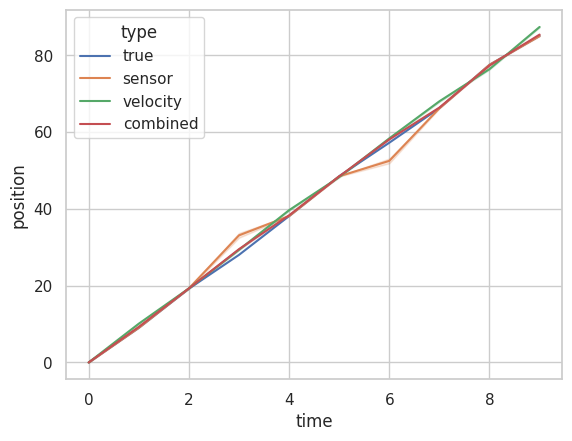

In [ ]:
# Plot the responses for different events and regions
import pandas as pd
ax = sns.lineplot(x="time", y="position",
             hue="type",
             data=pd.DataFrame(plot_data))

# Sensor good
# ax.set_xlim([0.75, 1])
# ax.set_ylim([7, 10])

# Sensor malfunction
# ax.set_xlim([2, 4])
# ax.set_ylim([20, 40])

# Sensor back online
# ax.set_xlim([4, 4.4])
# ax.set_ylim([38, 43])